<a href="https://colab.research.google.com/github/MartinSantaGitHub/curso-estadistica-multivariante/blob/master/Tareas/tarea_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MartinSantaGitHub/curso-estadistica-multivariante/master/Datos/companies79.csv')

In [ ]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8
0,1,BellAtlantic,19788,9084,10636,1092.9,2576.8,79.4,Communication
1,2,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication
2,3,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy
3,4,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy
4,5,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy


In [ ]:
df.shape

(79, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79 non-null     int64  
 1   V1          79 non-null     object 
 2   V2          79 non-null     int64  
 3   V3          79 non-null     int64  
 4   V4          79 non-null     int64  
 5   V5          79 non-null     float64
 6   V6          79 non-null     float64
 7   V7          79 non-null     float64
 8   V8          79 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 5.7+ KB


In [ ]:
df.rename(columns = {'V1' : 'Name', 
                     'V2' : 'Goods',
                     'V3': 'Sells',
                     'V4': 'MarketValue',
                     'V5' : 'Profits',
                     'V6' : 'CashFlow',
                     'V7' : 'Employees',
                     'V8' : 'Department'}, inplace = True)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Department'] = df['Department'].astype('category')
df['Name'] = df['Name'].astype('string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         79 non-null     string  
 1   Goods        79 non-null     int64   
 2   Sells        79 non-null     int64   
 3   MarketValue  79 non-null     int64   
 4   Profits      79 non-null     float64 
 5   CashFlow     79 non-null     float64 
 6   Employees    79 non-null     float64 
 7   Department   79 non-null     category
dtypes: category(1), float64(3), int64(3), string(1)
memory usage: 4.9 KB


In [ ]:
Xf = df.iloc[:,1:7]
Xf.head()

,Goods,Sells,MarketValue,Profits,CashFlow,Employees
0,19788,9084,10636,1092.9,2576.8,79.4
1,5074,2557,1892,239.9,578.3,21.9
2,13621,4848,4572,485.0,898.9,23.4
3,1117,1038,478,59.7,91.7,3.8
4,1633,701,679,74.3,135.9,2.8


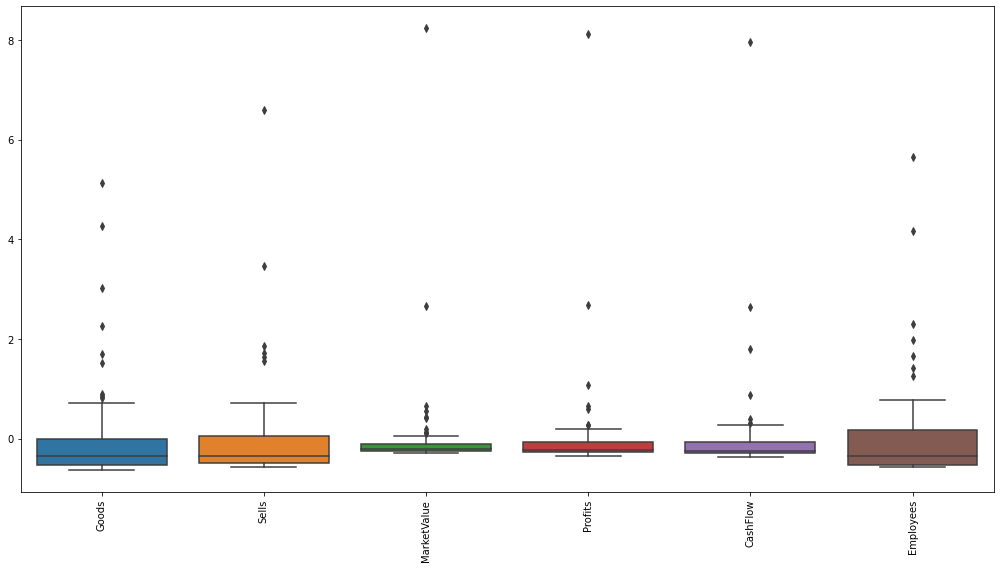

In [ ]:
scaler = StandardScaler()
scaled_features =scaler.fit_transform(Xf.values)
df_features_scaled = pd.DataFrame(scaled_features, index=Xf.index, columns=Xf.columns)

plt.figure(figsize = (14,8))
sns.boxplot(data = df_features_scaled)
plt.xticks(rotation = 90)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32e6dbfad0>,
      dtype=object)

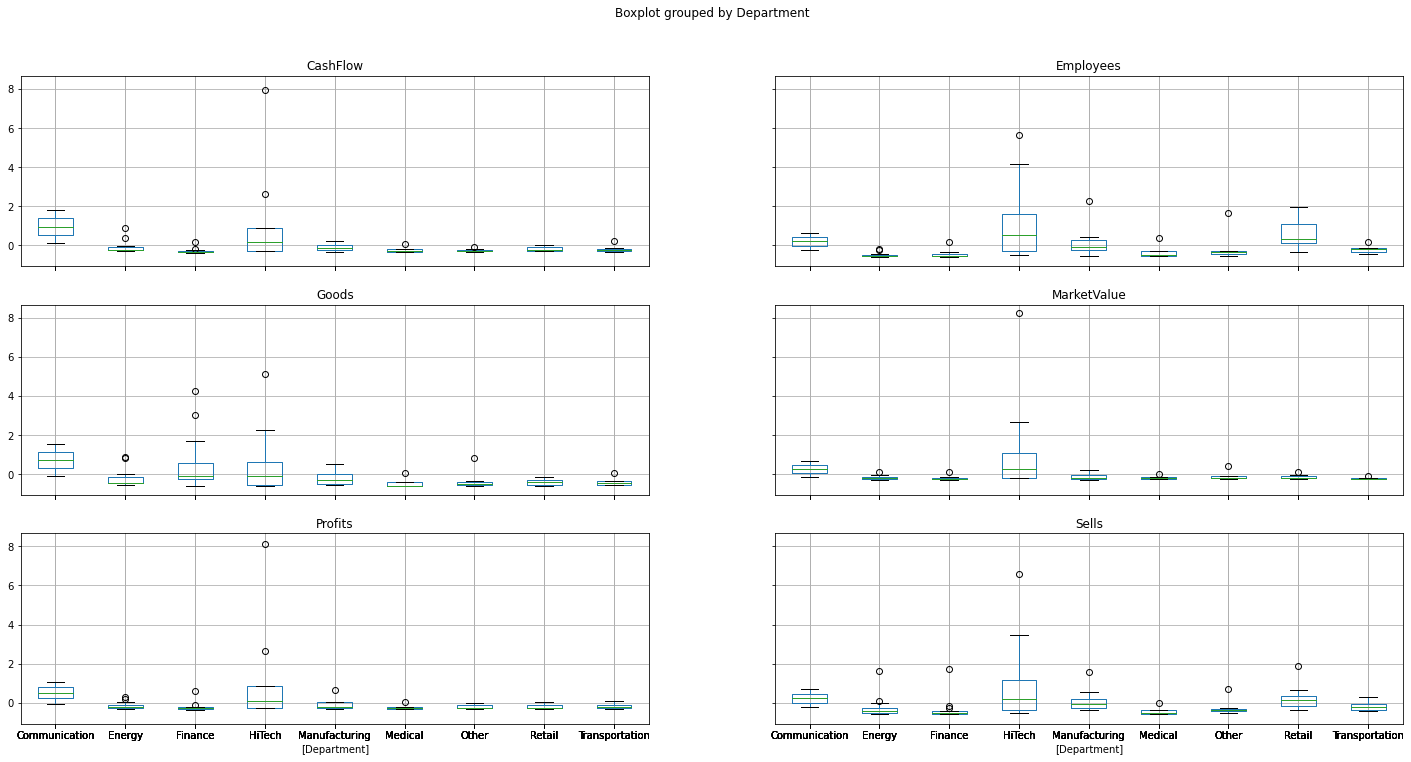

In [ ]:
df_features_scaled_y = pd.concat([df_features_scaled, df.iloc[:,7]], axis=1).reindex(df_features_scaled.index)
df_features_scaled_y.boxplot(by="Department", figsize=(24, 12))

<Figure size 1008x576 with 0 Axes>

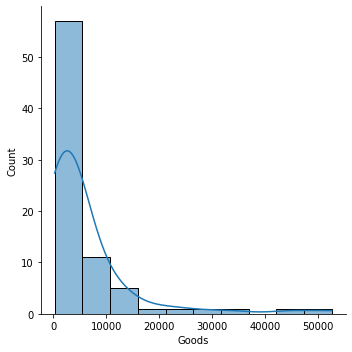

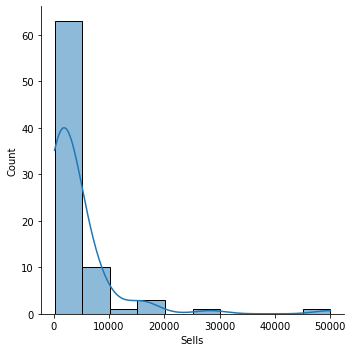

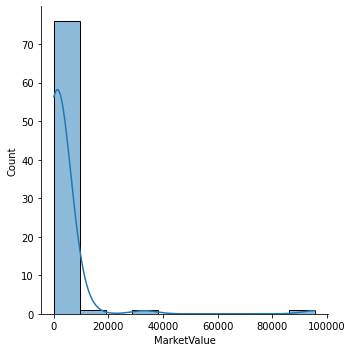

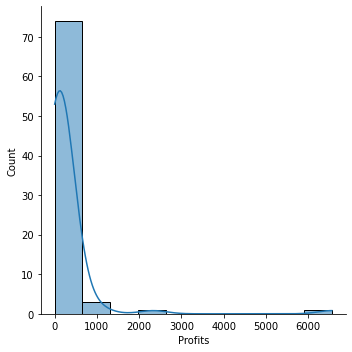

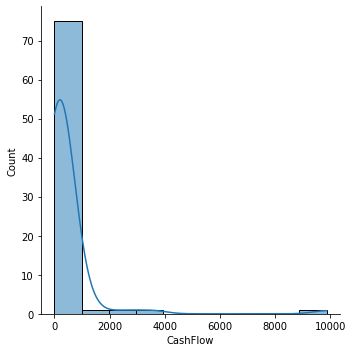

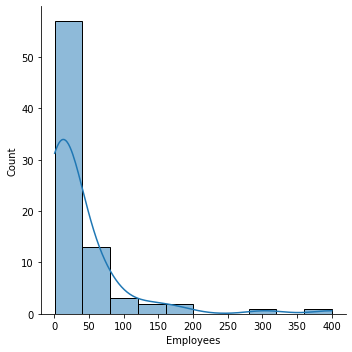

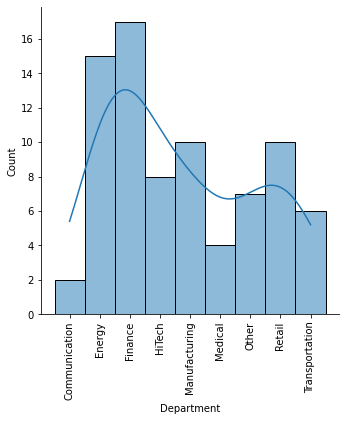

In [ ]:
plt.figure(figsize = (14,8))
lc = len(df.columns)

for i in range(1,lc):
  sns.displot(df.iloc[:,i],bins=10,kde=True)
  if (i == lc - 1):
    plt.xticks(rotation = 90)

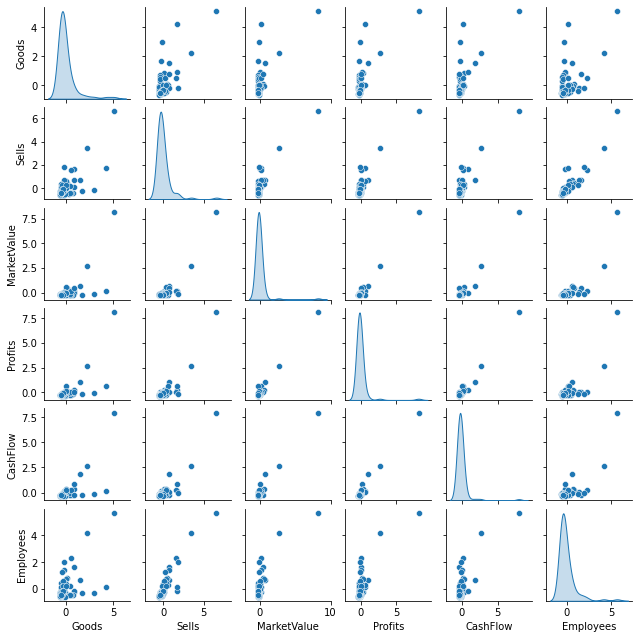

In [ ]:
sns.pairplot(df_features_scaled_y, diag_kind="kde", height=1.5)

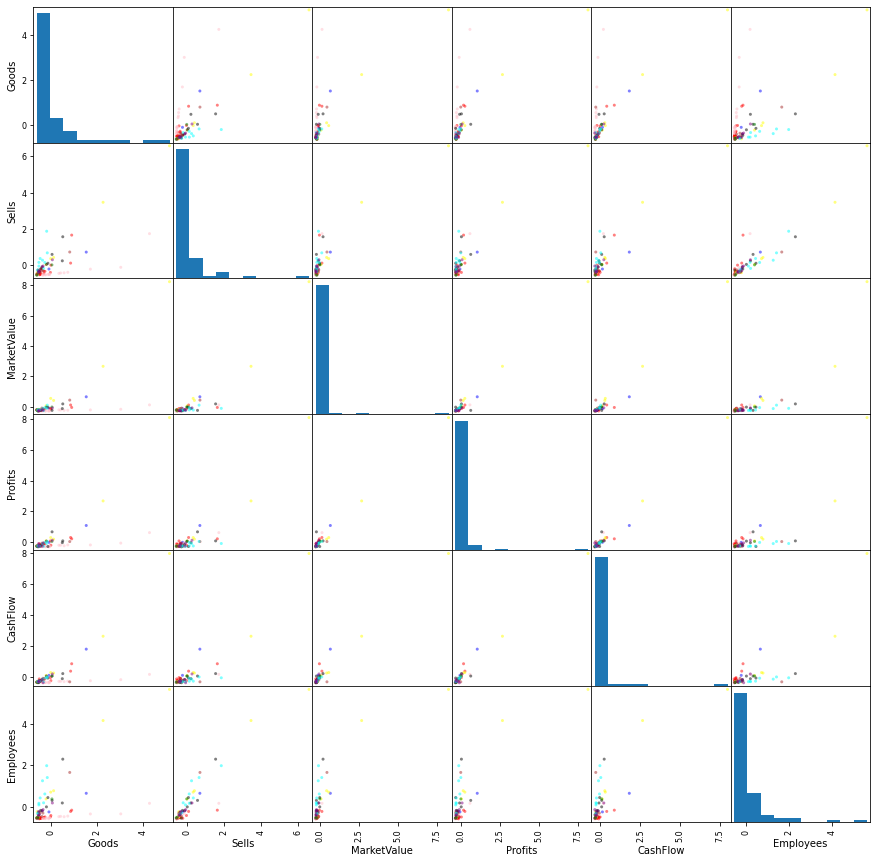

In [ ]:
df_features_scaled_y.iloc[:,6].cat.categories
color_dict = {'Communication': "blue", 'Energy': "red", 'Finance' : 'pink', 'HiTech': 'yellow',
                  'Manufacturing' : 'black', 'Medical' : 'green', 'Other' : 'brown', 'Retail' : 'cyan', 'Transportation' : 'purple'}
colors = df_features_scaled_y["Department"].map(lambda x: color_dict.get(x))
scatter_matrix(df_features_scaled_y, c = colors, alpha = 0.5, figsize = (15, 15))
plt.show()

In [3]:
df_features_scaled_y.head()

NameError: ignored